In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import PolyCollection
from matplotlib.lines import Line2D
import os
import matplotlib.ticker as ticker

fig, axes = plt.subplots(3, 2, figsize=(11, 14), dpi=1000, constrained_layout=True,sharex = True)
main_dir = '/Users/saschastocker/Documents/Stanford/work2024/FIMH2025/ReviewResults'
runs = ['AVG', 'AVGMD', 'AVGMDE1', 'AVGMDFA', 'all']
run_titles = {
    'AVG': 'Model1',
    'AVGMD': 'Model2',
    'AVGMDE1': 'Model3',
    'AVGMDFA': 'Model4',
    'all': 'Model5'
}

colors = sns.color_palette("colorblind",9)

colors2 = sns.color_palette("colorblind",9)[3:5]

colors3 = sns.color_palette("colorblind",12)[8:]



pred_colors = {
    'Model1': colors[2],#"lightblue",#'lightblue',
    'Model2': colors[2],#'lightgreen',
    'Model3': colors[2],#'lightcoral',
    'Model4': colors[2],#'lightgoldenrodyellow',
    'Model5': colors[2],#'lightpink'
}
formatted_labels = {
    'Model1': r'1',
    'Model2': r'2',
    'Model3': r'3',
    'Model4': r'4',
    'Model5': r'5'
}
dataset_order = [
    'Model1',
    'Model2',
    'Model3',
    'Model4',
    'Model5'
]
dataset_palette = {
    'Model1': 'lightblue',
    'Model2': 'lightgreen',
    'Model3': 'lightcoral',
    'Model4': 'lightgoldenrodyellow',
    'Model5': 'lightpink'
}



In [ ]:
colors2

In [ ]:


# -----------------------------------------------------------------------------
# A) Data Setup
# -----------------------------------------------------------------------------

ax = axes[2, 0]

all_data = []
for run in runs:
    csv_file_path = os.path.join(
        main_dir,
        f'ReviewHannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx'
    )

    df = pd.read_excel(csv_file_path)
    df = df[['Case ID', 'GT_Median_MD', 'Pred_median_MD']]
    df['Dataset'] = run_titles[run]

    df_melted = pd.melt(
        df,
        id_vars=['Case ID', 'Dataset'],
        value_vars=['GT_Median_MD', 'Pred_median_MD'],
        var_name='Type',
        value_name='Median'
    )
    df_melted['Type'] = df_melted['Type'].replace({
        'GT_Median_MD': 'GT',
        'Pred_median_MD': 'Pred'
    })

    all_data.append(df_melted)

combined_df = pd.concat(all_data, ignore_index=True)

# -----------------------------------------------------------------------------
# B) Setup Figure with Subplots


base_palette = {'GT': 'grey', 'Pred': 'grey'}

# -----------------------------------------------------------------------------
# D) Create the Split Violin Plot in Subplot
# -----------------------------------------------------------------------------
violin = sns.violinplot(
    x='Dataset',
    y='Median',
    hue='Type',
    data=combined_df,
    order=dataset_order,
    hue_order=['GT', 'Pred'],
    split=True,
    inner='quartile',
    palette=base_palette,
    cut=0,
    scale='width',
    width=0.8,
    linewidth=3,
    inner_kws={'linewidth': 4,'linestyle': '-'},
    ax=ax,  # Assigning subplot axis,
    zorder = 5
)

# -----------------------------------------------------------------------------
# E) Re-Color the Left (GT) & Right (Pred) Sides
# -----------------------------------------------------------------------------
all_polys = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
for i, ds_key in enumerate(dataset_order):
    left_patch = all_polys[2*i]       # GT side
    right_patch = all_polys[2*i + 1]  # Pred side

    left_patch.set_facecolor('grey')
    left_patch.set_alpha(0.6)
    left_patch.set_edgecolor('black')

    right_patch.set_facecolor(pred_colors[ds_key])
    right_patch.set_alpha(0.6)
    right_patch.set_edgecolor('black')

# -----------------------------------------------------------------------------
# F) Overlay Data Points & Connection Lines
# -----------------------------------------------------------------------------
for idx, ds_label in enumerate(dataset_order):
    df_dataset = combined_df[combined_df['Dataset'] == ds_label]
    
    # GT
    data_gt = df_dataset[df_dataset['Type'] == 'GT']['Median'].values
    x_gt = np.full(len(data_gt), idx - 0.15) + np.random.uniform(-0.02, 0.02, len(data_gt))
    ax.scatter(x_gt, data_gt, color='black', s=35, alpha=0.5, zorder=10,marker = '.')
    
    # Pred
    data_pred = df_dataset[df_dataset['Type'] == 'Pred']['Median'].values
    x_pred = np.full(len(data_pred), idx + 0.15) + np.random.uniform(-0.02, 0.02, len(data_pred))
    ax.scatter(x_pred, data_pred, color='black', s=35, alpha=0.5, zorder=10,marker = '.')
    
    # Lines connecting GT & Pred for each case
    for xg, xp, yg, yp in zip(x_gt, x_pred, data_gt, data_pred):
        ax.plot([xg, xp], [yg, yp], color='black', alpha=0.2, zorder=9, linewidth=3)

# -----------------------------------------------------------------------------
# G) Final Formatting
# -----------------------------------------------------------------------------

# Title
ax.set_xticklabels(
    [formatted_labels[label] for label in dataset_order],
    fontsize=8
)
ax.set_ylabel('[$μm^2$/ms]', fontsize=10)
ax.set_xlabel('')
ax.tick_params(axis='y', labelsize=10)
ax.set_xlim(-0.5, 4.5)

# Legend
#legend_elements = [
#    Line2D([0], [0], color='grey', lw=6, label='GT'),
#]
#ax.legend(legend_elements, ['GT'], fontsize=25)
ax.legend([], [], frameon=False)  # Remove legend
ax.set_title('E. MD',fontsize=25, fontweight='bold')
#ax.set_xticklabels([])
# Make quartile lines black
for line in ax.lines:
    line.set_color('black')  # Change color
    line.set_linewidth(2.5)  # Optional: Adjust thickness





In [ ]:
ax = axes[2,1]  # Assign the correct subplot

all_data = []
for run in runs:
    csv_file_path = os.path.join(
        main_dir,
        f'ReviewHannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx'
    )

    df = pd.read_excel(csv_file_path)
    df = df[['Case ID', 'GT_Median_FA', 'Pred_median_FA']]
    df['Dataset'] = run_titles[run]

    df_melted = pd.melt(
        df,
        id_vars=['Case ID', 'Dataset'],
        value_vars=['GT_Median_FA', 'Pred_median_FA'],
        var_name='Type',
        value_name='Median'
    )
    df_melted['Type'] = df_melted['Type'].replace({
        'GT_Median_FA': 'GT',
        'Pred_median_FA': 'Pred'
    })

    all_data.append(df_melted)

combined_df = pd.concat(all_data, ignore_index=True)

# -----------------------------------------------------------------------------
# D) Create the Split Violin Plot inside the subplot
# -----------------------------------------------------------------------------
sns.violinplot(
    x='Dataset',
    y='Median',
    hue='Type',
    data=combined_df,
    order=dataset_order,
    hue_order=['GT', 'Pred'],
    split=True,
    inner='quartile',
    palette=base_palette,
    cut=0,
    scale='width',
    width=0.8,
    linewidth=3,
    inner_kws={'linewidth': 4, 'linestyle': '-'},  # Solid median & quartile lines
    zorder=3,
    ax=ax  # <<< Place the plot inside the subplot
)

# -----------------------------------------------------------------------------
# E) Re-Color the Left (GT) & Right (Pred) Sides
# -----------------------------------------------------------------------------
all_polys = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
for i, ds_key in enumerate(dataset_order):
    left_patch = all_polys[2*i]       # GT side
    right_patch = all_polys[2*i + 1]  # Pred side

    left_patch.set_facecolor('grey')
    left_patch.set_alpha(0.6)
    left_patch.set_edgecolor('black')

    right_patch.set_facecolor(pred_colors[ds_key])
    right_patch.set_alpha(0.6)
    right_patch.set_edgecolor('black')

# -----------------------------------------------------------------------------
# F) Overlay Data Points & Connection Lines
# -----------------------------------------------------------------------------
for idx, ds_label in enumerate(dataset_order):
    df_dataset = combined_df[combined_df['Dataset'] == ds_label]
    
    # GT
    data_gt = df_dataset[df_dataset['Type'] == 'GT']['Median'].values
    x_gt = np.full(len(data_gt), idx - 0.15) + np.random.uniform(-0.02, 0.02, len(data_gt))
    ax.scatter(x_gt, data_gt, color='black', s=35, alpha=0.5, zorder=10,marker = '.')  # <<< ax instead of plt
    
    # Pred
    data_pred = df_dataset[df_dataset['Type'] == 'Pred']['Median'].values
    x_pred = np.full(len(data_pred), idx + 0.15) + np.random.uniform(-0.02, 0.02, len(data_pred))
    ax.scatter(x_pred, data_pred, color='black', s=35, alpha=0.5, zorder=10,marker = '.')  # <<< ax instead of plt
    
    # Lines connecting GT & Pred for each case
    for xg, xp, yg, yp in zip(x_gt, x_pred, data_gt, data_pred):
        ax.plot([xg, xp], [yg, yp], color='black', alpha=0.2, zorder=9, linewidth=3)  # <<< ax instead of plt

# -----------------------------------------------------------------------------
# G) Final Formatting
# -----------------------------------------------------------------------------
ax.set_xticklabels(
    [formatted_labels[label] for label in dataset_order],
    fontsize=8
)
ax.set_ylabel('[unitless]', fontsize=10)
ax.set_xlabel('')
ax.set_ylim(0.15, 0.3) 
ax.set_xlim(-0.5,4.5)
ax.tick_params(axis='y', labelsize=10)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.legend([], [], frameon=False)  # Remove legend
ax.set_title('F. FA',fontsize=25, fontweight='bold')
#ax.set_xticklabels('')
# Make quartile lines black
for line in ax.lines:
    line.set_color('black')  # Change color
    line.set_linewidth(2.5)  # Optional: Adjust thickness


In [ ]:
#!/usr/bin/env python3

from matplotlib.collections import PolyCollection  # For grabbing the violin polygons

# Use axes[0,1] for this plot
ax = axes[1,1]

# Define runs and corresponding dataset names


# Load data from each Excel file
all_data = []
for run in runs:
    excel_file_path = os.path.join(
        main_dir,
        f"ReviewHannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx"
    )
    
    df = pd.read_excel(excel_file_path, dtype={'Slice Number': str})
    
    # Zero-pad slice numbers and map names
    df['Slice Number'] = df['Slice Number'].str.zfill(3)
    slice_name_mapping = {'001': 'Apex', '002': 'Mid', '003': 'Base'}
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)
    df['Slice Name'].fillna('Unknown', inplace=True)
    
    # Create separate L2, L3 entries
    df_label2 = df.copy()
    df_label3 = df.copy()
    
    df_label2['HD'] = df_label2['Hausdorff Distance Label 2']
    df_label2['Label Type'] = 'L2'
    df_label2['Dataset'] = run_titles[run]

    df_label3['HD'] = df_label3['Hausdorff Distance Label 3']
    df_label3['Label Type'] = 'L3'
    df_label3['Dataset'] = run_titles[run]

    all_data.extend([df_label2, df_label3])

# Combine all data
combined_df = pd.concat(all_data, ignore_index=True)

# Identify inliers/outliers
threshold = 100
combined_df['Value Type'] = combined_df['HD'].apply(
    lambda x: 'Outlier' if x > threshold else 'Inlier'
)

# Count extreme failures (HD > 1000)
failure_threshold = 1000
failure_counts = (
    combined_df[combined_df['HD'] > failure_threshold]
    .groupby(['Dataset', 'Label Type'])
    .size()
)
failure_counts_dict = failure_counts.to_dict()

# Plotting parameters
marker_mapping = {'Apex': '.', 'Mid': '.', 'Base': '.'}
slice_color_mapping = {'Apex': 'blue', 'Mid': 'green', 'Base': 'orange'}

# Desired dataset colors for the violin fill

# Create the subplot grid



# Compute the max HD among inliers for y-label placement
max_hd_inliers = combined_df[combined_df['Value Type'] == 'Inlier']['HD'].max()
# Ensure y_text_offset fits within the plot's ylim
y_text_offset = min(max_hd_inliers + 1, ax.get_ylim()[1])  # Stay within axis limits

# Clear any existing collections
ax.clear()

# Draw the violin plot
sns_violin = sns.violinplot(
    x='Dataset',
    y='HD',
    hue='Label Type',
    data=combined_df[combined_df['Value Type'] == 'Inlier'], 
    split=True,
    palette=colors3,  # Placeholder colors (we'll change them next)
    
    cut=0,
    gap=0.4,
    inner='quartile',
    width=1.2,
    linewidth=3,
    inner_kws={'linewidth': 4, 'linestyle':'-'},
    order=run_titles.values(),
    hue_order=['L2', 'L3'],
    ax=ax,
    alpha = 0.6, 
    zorder = 4,
    
)
ax.set_xlabel("")

# Get PolyCollections and ensure we only process the expected number
poly_collection = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
datasets_ordered = list(run_titles.values())
expected_polygons = len(datasets_ordered) * 2  # 2 per dataset (L2 and L3)

print(f"Expected polygons: {expected_polygons}, Found: {len(poly_collection)}")

for i, poly in enumerate(poly_collection[:expected_polygons]):
    dataset_index = i // 2
    dataset_name = datasets_ordered[dataset_index]
    #color = pred_colors[dataset_name]
    #poly.set_facecolor(color)
    poly.set_edgecolor("black")
    poly.set_alpha(0.6)

# Scatter for apex, mid, base (within the subplot)
for idx, dataset_name in enumerate(run_titles.values()):
    for label_type, offset in zip(['L2', 'L3'], [-0.2, 0.2]):
        df_subset = combined_df[
            (combined_df['Dataset'] == dataset_name) & 
            (combined_df['Label Type'] == label_type)
        ]
        for slice_name in ['Apex', 'Mid', 'Base']:
            df_slice = df_subset[df_subset['Slice Name'] == slice_name]
            if not df_slice.empty:
                ax.scatter(
                    [idx + offset] * len(df_slice),
                    df_slice['HD'],
                    marker = '.',
                    color='black',
                    edgecolor='k',
                    s=35,
                    alpha=0.5,
                    zorder=5,  # Ensure it's above the violins
                    
                )


# Updated failure count plotting - ensure no duplicates and stay within axes
seen_counts = set()  # Track unique (dataset, label_type) combinations to prevent duplicates
for idx, dataset_name in enumerate(run_titles.values()):
    for label_type, offset in zip(['L2', 'L3'], [-0.2, 0.2]):
        key = (dataset_name, label_type)
        if key in seen_counts:
            continue  # Skip if we've already plotted this combination
        count = failure_counts_dict.get(key, 0)
        if count > 0:
            # Use transform to ensure text stays within axes
            ax.text(
                idx + offset,
                y_text_offset,
                s=str(count),
                ha='center',
                va='bottom',  # Anchor at bottom to prevent overflow
                fontsize=20,
                color='red',
                fontweight='bold',
                transform=ax.get_xaxis_transform(),  # Use axis transform for proper scaling
                clip_on=True  # Clip text to axes boundaries,
 
            )
        seen_counts.add(key)

# Overlay scatter for outliers [remains unchanged...]
ax.set_xticks(range(len(dataset_order)))
ax.set_xticklabels(
    [formatted_labels[label] for label in dataset_order],
    fontsize=8
)
ax.set_ylabel("[mm]", fontsize=10)
ax.set_ylim(0, 11)
ax.set_xlim(-0.5, 4.5)
ax.tick_params(axis='y', labelsize=10)
ax.legend([], [], frameon=False)
ax.set_title('D. HD IP',fontsize=25, fontweight='bold')
# Make quartile lines black
for line in ax.lines:
    line.set_color('black')  # Change color
    line.set_linewidth(2.5)  # Optional: Adjust thickness



  # Restore labels


In [ ]:
# Use axes[1,1] for this plot
ax = axes[1,0]  

# Define runs and corresponding dataset name

# Load data from each Excel file
all_data = []
for run in runs:
    excel_file_path = os.path.join(
        main_dir,
        f"ReviewHannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx"
    )
    
    df = pd.read_excel(excel_file_path, dtype={'Slice Number': str})
    
    # Zero-pad slice numbers and map names
    df['Slice Number'] = df['Slice Number'].str.zfill(2)
    slice_name_mapping = {'001': 'Apex', '002': 'Mid', '003': 'Base'}
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)
    df['Slice Name'].fillna('Unknown', inplace=True)
    
    # Create separate Epi / Endo entries
    df_epi = df.copy()
    df_endo = df.copy()
    
    # Pull values from the new columns
    df_epi['HD'] = df_epi['Avg. HD Epi']
    df_epi['Label Type'] = 'Epi'
    df_epi['Dataset'] = run_titles[run]

    df_endo['HD'] = df_endo['Avg. HD Endo']
    df_endo['Label Type'] = 'Endo'
    df_endo['Dataset'] = run_titles[run]

    all_data.extend([df_epi, df_endo])

# Combine all data
combined_df = pd.concat(all_data, ignore_index=True)

# Identify inliers/outliers (same threshold as before—adjust if desired)
threshold = 100
combined_df['Value Type'] = combined_df['HD'].apply(
    lambda x: 'Outlier' if x > threshold else 'Inlier'
)

# Count extreme failures (HD > 1000), if relevant
failure_threshold = 1000
failure_counts = (
    combined_df[combined_df['HD'] > failure_threshold]
    .groupby(['Dataset', 'Label Type'])
    .size()
)
failure_counts_dict = failure_counts.to_dict()

# Plotting parameters
marker_mapping = {'Apex': '.', 'Mid': '.', 'Base': '.'}
slice_color_mapping = {'Apex': 'blue', 'Mid': 'green', 'Base': 'orange'}


# Compute the max HD among inliers for y‐label placement
max_hd_inliers = combined_df[combined_df['Value Type'] == 'Inlier']['HD'].max()
y_text_offset = max_hd_inliers + 1

# Clear the existing plot in the subplot (if any)
ax.clear()

# === 1) Draw the violin plot within the correct subplot ===
sns.violinplot(
    x='Dataset',
    y='HD',
    hue='Label Type', 
    data=combined_df[combined_df['Value Type'] == 'Inlier'], 
    split=True,
    palette=colors2,  # Placeholder colors (we'll change them next)
    cut=0,
    inner='quartile',
    width=1.2,
    gap=0.4,
    order=run_titles.values(),
    hue_order=['Epi', 'Endo'],
    linewidth=3,
    inner_kws={'linewidth': 4,'linestyle': '-'},
    ax=ax,  # <<<< Ensure we plot on the correct subplot
    alpha = 0.6,
    zorder = 4,
)

ax.set_xlabel("")

# === 2) Post‐hoc color correction: each dataset => single color for both halves ===
poly_collection = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
datasets_ordered = list(run_titles.values())

for i, poly in enumerate(poly_collection):
    dataset_index = i // 2  # 2 polygons (Epi, Endo) per dataset
    dataset_name = datasets_ordered[dataset_index]
    #color = pred_colors[dataset_name]
    #poly.set_facecolor(color)
    poly.set_edgecolor("black")  
    poly.set_alpha(0.6)        

# === 2) Scatter plot for Apex, Mid, Base markers ===
for idx, dataset_name in enumerate(run_titles.values()):
    for label_type, offset in zip(['Epi', 'Endo'], [-0.2, 0.2]):
        df_subset = combined_df[
            (combined_df['Dataset'] == dataset_name) & 
            (combined_df['Label Type'] == label_type)
        ]
        for slice_name in ['Apex', 'Mid', 'Base']:
            df_slice = df_subset[df_subset['Slice Name'] == slice_name]
            if not df_slice.empty:
                ax.scatter(
                    [idx + offset] * len(df_slice),
                    df_slice['HD'],
                    marker = '.',
                    color='black',
                    edgecolor='k',
                    s=35,
                    alpha=0.5,
                    zorder=5,
                )

# === 4) Failure count text above violins ===
for idx, dataset_name in enumerate(run_titles.values()):
    for label_type, offset in zip(['Epi', 'Endo'], [-0.2, 0.2]):
        count = failure_counts_dict.get((dataset_name, label_type), 0)
        if count > 0:
            ax.text(
                idx + offset,
                y_text_offset,
                s=str(count),
                ha='center',
                fontsize=12,
                color='red',
                fontweight='bold'
            )

# === 5) Overlay scatter for outliers ===
outliers = combined_df[combined_df['Value Type'] == 'Outlier']
for label_type, offset in zip(['Epi', 'Endo'], [-0.2, 0.2]):
    df_outliers = outliers[outliers['Label Type'] == label_type]
    ax.scatter(
        df_outliers['Dataset'].map({k: i for i, k in enumerate(run_titles.values())}) + offset,
        df_outliers['HD'],
        color='red',
        edgecolor='k',
        s=35,
        alpha=0.5,
        zorder=6,
        
    )

# === 6) Final Formatting ===
ax.set_xticks(range(len(dataset_order)))
ax.set_xticklabels(
    [formatted_labels[label] for label in dataset_order],
    fontsize=8
)
ax.set_ylabel("[mm]", fontsize=12)
#ax.set_ylim(0, 0.5)  # Adjust y-limit dynamically
ax.set_xlim(-0.5, 4.5)
ax.tick_params(axis='y', labelsize=10)
ax.legend([], [], frameon=False)  # Remove legend
ax.set_title('C. AHD Contours',fontsize=25, fontweight='bold')
# Make quartile lines black
for line in ax.lines:
    line.set_color('black')  # Change color
    line.set_linewidth(2.5)  # Optional: Adjust thickness


# Ensure spacing between subplots is correct

In [ ]:
# smaller dots, larger fonts, share x is col  model 1 to model 5 , modify titles

In [ ]:

# Create figure
ax = axes[0, 0]  # Assign the correct subplot (3,3 in 1-based indexing -> 2,2 in 0-based)

# Load and process data
all_data = []
for run in runs:
    excel_file_path = os.path.join(
        main_dir,
        f"ReviewHannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx"
    )
    df = pd.read_excel(excel_file_path, dtype={'Slice Number': str})
    df['Slice Number'] = df['Slice Number'].str.zfill(3)
    slice_name_mapping = {'001': 'Apex', '002': 'Mid', '003': 'Base'}
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)
    df['Dice Score'] = df['Dice Score Original Label 1']
    df['Dataset'] = run_titles[run]
    all_data.append(df)

combined_df = pd.concat(all_data, ignore_index=True)
# Define plotting parameters
marker_mapping = {'Apex': '.', 'Mid': '.', 'Base': '.'}
offset_mapping = {'Apex': -0.1, 'Mid': 0.0, 'Base': 0.1}


# Plot violin plot in the specified subplot
sns.violinplot(
    x='Dataset',
    y='Dice Score',
    hue='Dataset',
    data=combined_df,
    palette=pred_colors,
    cut=0,
    inner='quartile',
    width=0.5,
    linewidth=3,
    inner_kws={'linewidth': 4,'linestyle': '-'},
    dodge=False,
    alpha = 0.6,
    ax=ax,
    zorder = 4,
)

# Add scatter points for individual slices
x_labels = list(run_titles.values())
for idx, dataset_name in enumerate(x_labels):
    df_subset = combined_df[combined_df['Dataset'] == dataset_name]
    for slice_name in ['Apex', 'Mid', 'Base']:
        df_slice = df_subset[df_subset['Slice Name'] == slice_name]
        if not df_slice.empty:
            x_offset = idx + offset_mapping[slice_name]
            ax.scatter(
                [x_offset] * len(df_slice),
                df_slice['Dice Score'],
                marker=marker_mapping[slice_name],
                color='black',  # Use consistent black color for dots
                edgecolor='k',
                s=35,
                alpha=0.5,
                zorder=5
            )
ax.set_xlabel('')
ax.set_ylabel('DSC', fontsize=12)
ax.set_xticklabels(
    [formatted_labels[label] for label in dataset_order],
    fontsize=8)
ax.set_ylim(0.8, 0.95)
ax.set_xlim(-0.5, 4.5)
ax.tick_params(axis='y', labelsize=10)
#ax.legend([], [], frameon=False)
ax.set_title('A. Dice Score',fontsize=25, fontweight='bold')
ax.set_xticklabels('')
# Make quartile lines black
for line in ax.lines:
    line.set_color('black')  # Change color
    line.set_linewidth(2.5)  # Optional: Adjust thickness



In [ ]:
#!/usr/bin/env python3

ax = axes[0,1]  # Assign the correct subplot (3,3 in 1-based indexing -> 2,1 in 0-based)

# Load and process data
all_data = []
for run in runs:
    excel_file_path = os.path.join(
        main_dir,
        f"ReviewHannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx"
    )
    df = pd.read_excel(excel_file_path, dtype={'Slice Number': str})
    df['Slice Number'] = df['Slice Number'].str.zfill(3)
    slice_name_mapping = {'001': 'Apex', '002': 'Mid', '003': 'Base'}
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)
    df['Slice Name'].fillna('Unknown', inplace=True)
    
    # Create separate Precision / Recall entries
    df_precision = df.copy()
    df_recall = df.copy()
    
    # Pull values from the new columns
    df_precision['Metric'] = df_precision['Precision']
    df_precision['Metric Type'] = 'Precision'
    df_precision['Dataset'] = run_titles[run]
    
    df_recall['Metric'] = df_recall['Recall']
    df_recall['Metric Type'] = 'Recall'
    df_recall['Dataset'] = run_titles[run]
    
    all_data.extend([df_precision, df_recall])
# Combine all data
combined_df = pd.concat(all_data, ignore_index=True)

# Plotting parameters
marker_mapping = {'Apex': '.', 'Mid': '.', 'Base': '.'}

# Clear the existing plot in the subplot (if any)
ax.clear()

# === 1) Draw the split violin plot within the correct subplot ===
sns.violinplot(
    x='Dataset',
    y='Metric',
    hue='Metric Type', 
    data=combined_df, 
    split=True,
    palette="colorblind",  # Placeholder colors (we'll change them next)
    cut=0,
    inner='quartile',
    width=1.2,
    gap=0.4,
    order=run_titles.values(),
    hue_order=['Precision', 'Recall'],
    linewidth=3,
    inner_kws={'linewidth': 4,'linestyle': '-','zorder': 12},
    ax=ax,
    alpha = 0.6,
    zorder = 4,
)

ax.set_xlabel("")

# === 2) Post-hoc color correction: each dataset => single color for both halves ===
#poly_collection = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
#datasets_ordered = list(run_titles.values())

for i, poly in enumerate(poly_collection):
#    dataset_index = i // 2  # 2 polygons (Precision, Recall) per dataset
#    dataset_name = datasets_ordered[dataset_index]
#    color = pred_colors[dataset_name]
#    poly.set_facecolor(color)
    poly.set_edgecolor("black")  
    poly.set_alpha(0.6)        

# === 3) Scatter plot for Apex, Mid, Base markers ===
for idx, dataset_name in enumerate(run_titles.values()):
    for metric_type, offset in zip(['Precision', 'Recall'], [-0.2, 0.2]):
        df_subset = combined_df[
            (combined_df['Dataset'] == dataset_name) & 
            (combined_df['Metric Type'] == metric_type)
        ]
        for slice_name in ['Apex', 'Mid', 'Base']:
            df_slice = df_subset[df_subset['Slice Name'] == slice_name]
            if not df_slice.empty:
                ax.scatter(
                    [idx + offset] * len(df_slice),
                    df_slice['Metric'],
                    marker=marker_mapping[slice_name],
                    color='black',
                    edgecolor='k',
                    s=35,
                    alpha=0.5,
                    zorder=5,
                )

# === 4) Final Formatting ===

ax.set_xticklabels(
    [formatted_labels[label] for label in dataset_order],
    fontsize=12
)
#ax.set_xticklabels('')
ax.set_ylabel("[unitless]", fontsize=12)
ax.set_ylim(0.75, 1)
ax.set_xlim(-0.5, 4.5)
ax.tick_params(axis='y', labelsize=10)
ax.legend([], [], frameon=False)
ax.set_title('B. Precision and Recall',fontsize=25, fontweight='bold')
#ax.set_xticklabels('')
# Make quartile lines black
for line in ax.lines:
    line.set_color('black')  # Change color
    line.set_linewidth(2.5)  # Optional: Adjust thickness


ax = fig.axes[1]
handles, labels = ax.get_legend_handles_labels()  # Get current legend handles
custom_labels = ['Precision', 'Recall']  # Adjust labels as needed
ax.legend(handles=handles, labels=custom_labels, loc='lower center', fontsize=16,ncol = 2)

ax = fig.axes[2]
handles, labels = ax.get_legend_handles_labels()  # Get current legend handles
custom_labels = ['Endo', 'Epi']  # Adjust labels as needed
ax.legend(handles=handles, labels=custom_labels, loc='upper center', fontsize=16,ncol = 2)

ax = fig.axes[3]
handles, labels = ax.get_legend_handles_labels()  # Get current legend handles
custom_labels = ['Anterior', 'Inferior']  # Adjust labels as needed
ax.legend(handles=handles, labels=custom_labels, loc='upper center', fontsize=16,ncol = 2)


for ii in range(4,6):
    ax = fig.axes[ii]
    handles, labels = ax.get_legend_handles_labels()  # Get current legend handles
    custom_labels = ['GT']  # Adjust labels as needed
    ax.legend(handles=handles, labels=custom_labels, loc='lower center', fontsize=16,ncol = 2)


ax = fig.axes[4]
ax.set_ylim([1,2.01])

ax = fig.axes[5]
ax.set_ylim([0,0.3])

for ii in range(2):
    ax = fig.axes[ii]
    ax.set_ylim([0.78,1.005])

for ii in [-1,-2]:
    fig.axes[ii].set_xlabel('Model #')  # Set common x-axis label    



for ax in fig.axes:  
        # Manually update quartile lines to be solid black
    for line in ax.lines:  
        line.set_linestyle('-')  # Solid line
        line.set_linewidth(3)    # Make it thicker
        line.set_color('black')  # Set color to black
        line.set_zorder(10)      # Ensure lines are above the violin plot

    ax.grid(True, axis='both', linestyle='--', linewidth=1,zorder= -10,alpha = 0.5 )
    ax.tick_params(axis='both', labelsize=22)  # Increase tick label size
    ax.xaxis.label.set_fontsize(25)  # Increase x-axis label size
    ax.yaxis.label.set_fontsize(25)  # Increase y-axis label size


# Ensure spacing between subplots is correct
plt.tight_layout()
plt.show()


In [ ]:
fig

In [ ]:
fig.savefig('boxplot.tiff')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# === Create standalone figure ===
fig, ax = plt.subplots(figsize=(6, 6))  # You can change size if needed

# === Load and process data ===
all_data = []
for run in runs:
    excel_file_path = os.path.join(
        main_dir,
        f"ReviewHannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx"
    )
    df = pd.read_excel(excel_file_path, dtype={'Slice Number': str})
    df['Slice Number'] = df['Slice Number'].str.zfill(3)
    slice_name_mapping = {'001': 'Apex', '002': 'Mid', '003': 'Base'}
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)
    df['Dice Score'] = df['Dice Score Original Label 1']
    df['Dataset'] = run_titles[run]
    all_data.append(df)

combined_df = pd.concat(all_data, ignore_index=True)

# === Plotting parameters ===
marker_mapping = {'Apex': '.', 'Mid': '.', 'Base': '.'}
offset_mapping = {'Apex': -0.1, 'Mid': 0.0, 'Base': 0.1}
dataset_order = list(run_titles.values())  # Ensure this is correct

# === Violin plot ===
sns.violinplot(
    x='Dice Score',
    y='Dataset',
    hue='Dataset',
    data=combined_df,
    palette=pred_colors,
    cut=0,
    inner='quartile',
    width=0.5,
    linewidth=3,
    inner_kws={'linewidth': 4, 'linestyle': '-'},
    dodge=False,
    alpha=0.6,
    ax=ax,
    zorder=4,
)

# === Scatter points (aligned with dataset_order) ===
for idx, dataset_name in enumerate(dataset_order):
    df_subset = combined_df[combined_df['Dataset'] == dataset_name]
    for slice_name in ['Apex', 'Mid', 'Base']:
        df_slice = df_subset[df_subset['Slice Name'] == slice_name]
        if not df_slice.empty:
            y_offset = idx + offset_mapping[slice_name]
            ax.scatter(
                df_slice['Dice Score'],
                [y_offset] * len(df_slice),
                marker=marker_mapping[slice_name],
                color='black',
                edgecolor='k',
                s=100,
                alpha=0.5,
                zorder=5
            )

# === Axis settings ===
ax.set_xlim(0.85, 1)
ax.set_ylim(-0.5, len(dataset_order) - 0.5)
ax.set_xlabel('[unitless]', fontsize=25)
ax.set_ylabel('')

# === Y-axis tick labels ===
#model_labels = [f"Model {i+1}" for i in range(len(dataset_order))]
ax.set_yticks(range(len(dataset_order)))
#ax.set_yticklabels(model_labels, fontsize=10)
ax.set_yticklabels('')
ax.invert_yaxis()


ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.legend([], [], frameon=False)  # Remove legend
#ax.set_title('Dice Similarity Coefficient', fontsize=25, fontweight='bold')

# === Make quartile lines black ===
for line in ax.lines:
    line.set_color('black')
    line.set_linewidth(2.5)
ax.set_title('Dice Similarity Coefficient', fontsize=25, fontweight='bold')


fig.tight_layout()
fig.savefig("Dicealone.png", dpi=300)


In [ ]:
print(combined_df['Dice Score'].describe())


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from matplotlib.collections import PolyCollection

# === Create new figure for standalone AHD plot ===
fig, ax = plt.subplots(figsize=(6, 6))

# === Load and process data ===
all_data = []
for run in runs:
    excel_file_path = os.path.join(
        main_dir,
        f"ReviewHannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx"
    )
    
    df = pd.read_excel(excel_file_path, dtype={'Slice Number': str})
    df['Slice Number'] = df['Slice Number'].str.zfill(3)
    slice_name_mapping = {'001': 'Apex', '002': 'Mid', '003': 'Base'}
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)
    df['Slice Name'].fillna('Unknown', inplace=True)
    
    df_epi = df.copy()
    df_endo = df.copy()
    df_epi['HD'] = df_epi['Avg. HD Epi']
    df_endo['HD'] = df_endo['Avg. HD Endo']
    df_epi['Label Type'] = 'Epi'
    df_endo['Label Type'] = 'Endo'
    df_epi['Dataset'] = run_titles[run]
    df_endo['Dataset'] = run_titles[run]
    
    all_data.extend([df_epi, df_endo])

combined_df = pd.concat(all_data, ignore_index=True)

# === Define inliers and outliers ===
threshold = 100
combined_df['Value Type'] = combined_df['HD'].apply(lambda x: 'Outlier' if x > threshold else 'Inlier')

# === Count failures over 1000mm ===
failure_threshold = 1000
failure_counts = (
    combined_df[combined_df['HD'] > failure_threshold]
    .groupby(['Dataset', 'Label Type'])
    .size()
)
failure_counts_dict = failure_counts.to_dict()

# === Plotting settings ===
marker_mapping = {'Apex': '.', 'Mid': '.', 'Base': '.'}
slice_color_mapping = {'Apex': 'blue', 'Mid': 'green', 'Base': 'orange'}
x_labels = list(run_titles.values())
datasets_ordered = list(run_titles.values())
max_hd_inliers = combined_df[combined_df['Value Type'] == 'Inlier']['HD'].max()
y_text_offset = max_hd_inliers + 1
sns.violinplot(
    x='HD',
    y='Dataset',
    hue='Label Type',
    data=combined_df[combined_df['Value Type'] == 'Inlier'],
    split=True,
    palette=colors2,
    cut=0,
    inner='quartile',
    width=1.2,
    gap=0.4,
    order=datasets_ordered,
    hue_order=['Epi', 'Endo'],
    linewidth=3,
    inner_kws={'linewidth': 4, 'linestyle': '-'},
    ax=ax,
    alpha=0.6,
    zorder=4,
)

# === Black edges for violins ===
poly_collection = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
for poly in poly_collection:
    poly.set_edgecolor("black")
    poly.set_alpha(0.6)

# === Inlier scatter points (flipped) ===
for idx, dataset_name in enumerate(datasets_ordered):
    for label_type, offset in zip(['Epi', 'Endo'], [-0.2, 0.2]):
        df_subset = combined_df[
            (combined_df['Dataset'] == dataset_name) &
            (combined_df['Label Type'] == label_type)
        ]
        for slice_name in ['Apex', 'Mid', 'Base']:
            df_slice = df_subset[df_subset['Slice Name'] == slice_name]
            if not df_slice.empty:
                ax.scatter(
                    df_slice['HD'],
                    [idx + offset] * len(df_slice),
                    marker='.',
                    color='black',
                    edgecolor='k',
                    s=100,
                    alpha=0.5,
                    zorder=5,
                )

# === Failure count annotations (flipped) ===
for idx, dataset_name in enumerate(datasets_ordered):
    for label_type, offset in zip(['Epi', 'Endo'], [-0.2, 0.2]):
        count = failure_counts_dict.get((dataset_name, label_type), 0)
        if count > 0:
            ax.text(
                y_text_offset,
                idx + offset,
                s=str(count),
                va='center',
                fontsize=12,
                color='red',
                fontweight='bold'
            )

# === Outlier scatter (flipped) ===
outliers = combined_df[combined_df['Value Type'] == 'Outlier']
for label_type, offset in zip(['Epi', 'Endo'], [-0.2, 0.2]):
    df_outliers = outliers[outliers['Label Type'] == label_type]
    ax.scatter(
        df_outliers['HD'],
        df_outliers['Dataset'].map({k: i for i, k in enumerate(datasets_ordered)}) + offset,
        color='red',
        edgecolor='k',
        s=100,
        alpha=0.5,
        zorder=6,
    )

# === Final formatting (flipped) ===
#model_labels = [f"Model {i+1}" for i in range(len(dataset_order))]
ax.set_yticks(range(len(dataset_order)))
ax.set_ylim(-0.5, len(dataset_order) - 0.5)
ax.set_yticklabels('')
ax.set_xlim(0.05, 0.45)
ax.set_xlabel('[mm]', fontsize=25)
ax.set_ylabel('')
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.invert_yaxis()  # Flip to have Model 1 at top
ax.legend([], [], frameon=False)
ax.set_title('Average Hausdorff Distance', fontsize=25, fontweight='bold')

# Make quartile lines black
for line in ax.lines:
    line.set_color('black')
    line.set_linewidth(2.5)

fig.tight_layout()
fig.savefig("AHDalone.png", dpi=300)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np
from matplotlib.collections import PolyCollection

# === Create new figure ===
fig, ax = plt.subplots(figsize=(6, 6))

# === Load and process data ===
all_data = []
for run in runs:
    csv_file_path = os.path.join(
        main_dir,
        f'ReviewHannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx'
    )

    df = pd.read_excel(csv_file_path)
    df = df[['Case ID', 'GT_Median_MD', 'Pred_median_MD']]
    df['Dataset'] = run_titles[run]

    df_melted = pd.melt(
        df,
        id_vars=['Case ID', 'Dataset'],
        value_vars=['GT_Median_MD', 'Pred_median_MD'],
        var_name='Type',
        value_name='Median'
    )
    df_melted['Type'] = df_melted['Type'].replace({
        'GT_Median_MD': 'GT',
        'Pred_median_MD': 'Pred'
    })

    all_data.append(df_melted)

combined_df = pd.concat(all_data, ignore_index=True)

# === Plot ===
base_palette = {'GT': 'grey', 'Pred': 'grey'}

sns.violinplot(
    x='Dataset',
    y='Median',
    hue='Type',
    data=combined_df,
    order=dataset_order,
    hue_order=['GT', 'Pred'],
    split=True,
    inner='quartile',
    palette=base_palette,
    cut=0,
    scale='width',
    width=0.8,
    linewidth=3,
    inner_kws={'linewidth': 4, 'linestyle': '-'},
    ax=ax,
    zorder=5
)

# === Custom color patch assignment ===
all_polys = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
for i, ds_key in enumerate(dataset_order):
    left_patch = all_polys[2*i]       # GT side
    right_patch = all_polys[2*i + 1]  # Pred side

    left_patch.set_facecolor('grey')
    left_patch.set_alpha(0.6)
    left_patch.set_edgecolor('black')

    right_patch.set_facecolor(pred_colors[ds_key])
    right_patch.set_alpha(0.6)
    right_patch.set_edgecolor('black')

# === Scatter points and connecting lines ===
for idx, ds_label in enumerate(dataset_order):
    df_dataset = combined_df[combined_df['Dataset'] == ds_label]
    
    data_gt = df_dataset[df_dataset['Type'] == 'GT']['Median'].values
    x_gt = np.full(len(data_gt), idx - 0.15) + np.random.uniform(-0.02, 0.02, len(data_gt))
    ax.scatter(x_gt, data_gt, color='black', s=100, alpha=0.5, zorder=10, marker='.')
    
    data_pred = df_dataset[df_dataset['Type'] == 'Pred']['Median'].values
    x_pred = np.full(len(data_pred), idx + 0.15) + np.random.uniform(-0.02, 0.02, len(data_pred))
    ax.scatter(x_pred, data_pred, color='black', s=100, alpha=0.5, zorder=10, marker='.')
    
    for xg, xp, yg, yp in zip(x_gt, x_pred, data_gt, data_pred):
        ax.plot([xg, xp], [yg, yp], color='black', alpha=0.2, zorder=9, linewidth=3)

# === Final Formatting ===
ax.set_xticklabels(
    [formatted_labels[label] for label in dataset_order],
    fontsize=8
)
ax.set_ylabel('[$μm^2$/ms]', fontsize=25)
ax.set_xlabel('')
model_labels = [f"Model {i+1}" for i in range(len(dataset_order))]
ax.set_xticklabels(model_labels, fontsize=10)


ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.set_xlim(-0.5, 4.5)
ax.legend([], [], frameon=False)  # Remove legend
ax.set_title( 'Mean Diffusivity', fontsize=25, fontweight='bold')

# Make quartile lines black
for line in ax.lines:
    line.set_color('black')
    line.set_linewidth(2.5)

fig.tight_layout()
fig.savefig("MedianDiffusivity_MD_Standalone.png", dpi=300)
# plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from matplotlib.collections import PolyCollection
import matplotlib.ticker as ticker

# === Create new standalone figure ===
fig, ax = plt.subplots(figsize=(6, 6))

# === Load and process data ===
all_data = []
for run in runs:
    csv_file_path = os.path.join(
        main_dir,
        f'ReviewHannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx'
    )

    df = pd.read_excel(csv_file_path)
    df = df[['Case ID', 'GT_Median_FA', 'Pred_median_FA']]
    df['Dataset'] = run_titles[run]

    df_melted = pd.melt(
        df,
        id_vars=['Case ID', 'Dataset'],
        value_vars=['GT_Median_FA', 'Pred_median_FA'],
        var_name='Type',
        value_name='Median'
    )
    df_melted['Type'] = df_melted['Type'].replace({
        'GT_Median_FA': 'GT',
        'Pred_median_FA': 'Pred'
    })

    all_data.append(df_melted)

combined_df = pd.concat(all_data, ignore_index=True)

# === Create violin plot ===
sns.violinplot(
    x='Dataset',
    y='Median',
    hue='Type',
    data=combined_df,
    order=dataset_order,
    hue_order=['GT', 'Pred'],
    split=True,
    inner='quartile',
    palette=base_palette,
    cut=0,
    scale='width',
    width=0.8,
    linewidth=3,
    inner_kws={'linewidth': 4, 'linestyle': '-'},
    zorder=3,
    ax=ax
)

# === Manually adjust color of each half ===
all_polys = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
for i, ds_key in enumerate(dataset_order):
    left_patch = all_polys[2 * i]
    right_patch = all_polys[2 * i + 1]
    
    left_patch.set_facecolor('grey')
    left_patch.set_alpha(0.6)
    left_patch.set_edgecolor('black')
    
    right_patch.set_facecolor(pred_colors[ds_key])
    right_patch.set_alpha(0.6)
    right_patch.set_edgecolor('black')

# === Overlay scatter points + connection lines ===
for idx, ds_label in enumerate(dataset_order):
    df_dataset = combined_df[combined_df['Dataset'] == ds_label]
    
    data_gt = df_dataset[df_dataset['Type'] == 'GT']['Median'].values
    x_gt = np.full(len(data_gt), idx - 0.15) + np.random.uniform(-0.02, 0.02, len(data_gt))
    ax.scatter(x_gt, data_gt, color='black', s=100, alpha=0.5, zorder=10, marker='.')
    
    data_pred = df_dataset[df_dataset['Type'] == 'Pred']['Median'].values
    x_pred = np.full(len(data_pred), idx + 0.15) + np.random.uniform(-0.02, 0.02, len(data_pred))
    ax.scatter(x_pred, data_pred, color='black', s=100, alpha=0.5, zorder=10, marker='.')
    
    for xg, xp, yg, yp in zip(x_gt, x_pred, data_gt, data_pred):
        ax.plot([xg, xp], [yg, yp], color='black', alpha=0.2, zorder=9, linewidth=3)


# === Final Formatting ===
ax.set_xticklabels(
    [formatted_labels[label] for label in dataset_order],
    fontsize=8
)
ax.set_ylabel('[unitless]', fontsize=25)
ax.set_xlabel('')
model_labels = [f"Model {i+1}" for i in range(len(dataset_order))]
ax.set_xticklabels(model_labels, fontsize=10)


ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.set_xlim(-0.5, 4.5)
ax.legend([], [], frameon=False)  # Remove legend
ax.set_title( 'Fractioanl Anisotropy', fontsize=25, fontweight='bold')

# Make quartile lines black
for line in ax.lines:
    line.set_color('black')
    line.set_linewidth(2.5)

fig.tight_layout()
fig.savefig("MedianDiffusivity_MD_Standalone.png", dpi=300)
# plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from matplotlib.collections import PolyCollection

# === Create standalone figure ===
fig, ax = plt.subplots(figsize=(6, 6))

# === Load and process data ===
all_data = []
for run in runs:
    excel_file_path = os.path.join(
        main_dir,
        f"ReviewHannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx"
    )
    
    df = pd.read_excel(excel_file_path, dtype={'Slice Number': str})
    df['Slice Number'] = df['Slice Number'].str.zfill(3)
    slice_name_mapping = {'001': 'Apex', '002': 'Mid', '003': 'Base'}
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)
    df['Slice Name'].fillna('Unknown', inplace=True)
    
    df_label2 = df.copy()
    df_label3 = df.copy()
    
    df_label2['HD'] = df_label2['Hausdorff Distance Label 2']
    df_label2['Label Type'] = 'Anterior'
    df_label2['Dataset'] = run_titles[run]

    df_label3['HD'] = df_label3['Hausdorff Distance Label 3']
    df_label3['Label Type'] = 'Inferior'
    df_label3['Dataset'] = run_titles[run]

    all_data.extend([df_label2, df_label3])

combined_df = pd.concat(all_data, ignore_index=True)

# === Inliers / Outliers ===
threshold = 100
combined_df['Value Type'] = combined_df['HD'].apply(lambda x: 'Outlier' if x > threshold else 'Inlier')
failure_threshold = 1000
failure_counts = (
    combined_df[combined_df['HD'] > failure_threshold]
    .groupby(['Dataset', 'Label Type'])
    .size()
)
failure_counts_dict = failure_counts.to_dict()

# === Main violin plot (horizontal) ===
sns.violinplot(
    x='HD',
    y='Dataset',
    hue='Label Type',
    data=combined_df[combined_df['Value Type'] == 'Inlier'],
    split=True,
    palette='colorblind',
    cut=0,
    inner='quartile',
    width=1.2,
    gap=0.4,
    linewidth=3,
    inner_kws={'linewidth': 4, 'linestyle': '-'},
    order=list(run_titles.values()),
    hue_order=['Anterior', 'Inferior'],
    ax=ax,
    alpha=0.6,
    zorder=4,
)

# === Format violins ===
poly_collection = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
for poly in poly_collection:
    poly.set_edgecolor("black")
    poly.set_alpha(0.6)

# === Apex/Mid/Base markers (horizontal) ===
marker_mapping = {'Apex': '.', 'Mid': '.', 'Base': '.'}
for idx, dataset_name in enumerate(run_titles.values()):
    for label_type, offset in zip(['Anterior', 'Inferior'], [-0.2, 0.2]):
        df_subset = combined_df[
            (combined_df['Dataset'] == dataset_name) & 
            (combined_df['Label Type'] == label_type)
        ]
        for slice_name in ['Apex', 'Mid', 'Base']:
            df_slice = df_subset[df_subset['Slice Name'] == slice_name]
            if not df_slice.empty:
                ax.scatter(
                    df_slice['HD'],
                    [idx + offset] * len(df_slice),
                    marker=marker_mapping[slice_name],
                    color='black',
                    edgecolor='k',
                    s=35,
                    alpha=0.5,
                    zorder=5,
                )

# === Failure count annotations (horizontal) ===
max_hd_inliers = combined_df[combined_df['Value Type'] == 'Inlier']['HD'].max()
x_text_offset = min(max_hd_inliers + 1, 10)
seen_counts = set()
for idx, dataset_name in enumerate(run_titles.values()):
    for label_type, offset in zip(['Anterior', 'Inferior'], [-0.2, 0.2]):
        key = (dataset_name, label_type)
        if key in seen_counts:
            continue
        count = failure_counts_dict.get(key, 0)
        if count > 0:
            ax.text(
                x_text_offset,
                idx + offset,
                s=str(count),
                ha='left',
                va='center',
                fontsize=14,
                color='red',
                fontweight='bold',
                clip_on=True
            )
        seen_counts.add(key)

# === Outlier overlay (horizontal) ===
outliers = combined_df[combined_df['Value Type'] == 'Outlier']
for label_type, offset in zip(['Anterior', 'Inferior'], [-0.2, 0.2]):
    df_out = outliers[outliers['Label Type'] == label_type]
    ax.scatter(
        df_out['HD'],
        df_out['Dataset'].map({k: i for i, k in enumerate(run_titles.values())}) + offset,
        color='red',
        edgecolor='k',
        s=100,
        alpha=0.5,
        zorder=6,
    )

# === Final Formatting (horizontal) ===
#model_labels = [f"Model {i+1}" for i in range(len(dataset_order))]
ax.set_yticks(range(len(dataset_order)))
ax.set_ylim(-0.5, len(dataset_order) - 0.5)
ax.set_yticklabels('')

ax.set_xlim(0, max_hd_inliers + 2)
ax.set_xlabel('[mm]', fontsize=25)
ax.set_ylabel('')
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.invert_yaxis()  # Model 1 at the top
ax.legend([], [], frameon=False)
ax.set_title('Distance', fontsize=25, fontweight='bold')

# Make quartile lines black
for line in ax.lines:
    line.set_color('black')
    line.set_linewidth(2.5)

fig.tight_layout()
fig.savefig("HD_alone.png", dpi=300)
# plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from matplotlib.collections import PolyCollection

# === Create standalone figure ===
fig, ax = plt.subplots(figsize=(6, 6))

# === Load and process data ===
all_data = []
for run in runs:
    excel_file_path = os.path.join(
        main_dir,
        f"ReviewHannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx"
    )
    df = pd.read_excel(excel_file_path, dtype={'Slice Number': str})
    df['Slice Number'] = df['Slice Number'].str.zfill(3)
    slice_name_mapping = {'001': 'Apex', '002': 'Mid', '003': 'Base'}
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)
    df['Slice Name'].fillna('Unknown', inplace=True)

    df_precision = df.copy()
    df_recall = df.copy()

    df_precision['Metric'] = df_precision['Precision']
    df_precision['Metric Type'] = 'Precision'
    df_precision['Dataset'] = run_titles[run]

    df_recall['Metric'] = df_recall['Recall']
    df_recall['Metric Type'] = 'Recall'
    df_recall['Dataset'] = run_titles[run]

    all_data.extend([df_precision, df_recall])

combined_df = pd.concat(all_data, ignore_index=True)

# === Plot violin ===
sns.violinplot(
    x='Dataset',
    y='Metric',
    hue='Metric Type',
    data=combined_df,
    split=True,
    palette="colorblind",
    cut=0,
    inner='quartile',
    width=1.2,
    gap=0.4,
    order=run_titles.values(),
    hue_order=['Precision', 'Recall'],
    linewidth=3,
    inner_kws={'linewidth': 4, 'linestyle': '-', 'zorder': 12},
    ax=ax,
    alpha=0.6,
    zorder=4,
)

# === Fix outline styling ===
poly_collection = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
for poly in poly_collection:
    poly.set_edgecolor("black")
    poly.set_alpha(0.6)

# === Scatter points for Apex/Mid/Base ===
marker_mapping = {'Apex': '.', 'Mid': '.', 'Base': '.'}
for idx, dataset_name in enumerate(run_titles.values()):
    for metric_type, offset in zip(['Precision', 'Recall'], [-0.2, 0.2]):
        df_subset = combined_df[
            (combined_df['Dataset'] == dataset_name) &
            (combined_df['Metric Type'] == metric_type)
        ]
        for slice_name in ['Apex', 'Mid', 'Base']:
            df_slice = df_subset[df_subset['Slice Name'] == slice_name]
            if not df_slice.empty:
                ax.scatter(
                    [idx + offset] * len(df_slice),
                    df_slice['Metric'],
                    marker=marker_mapping[slice_name],
                    color='black',
                    edgecolor='k',
                    s=100,
                    alpha=0.5,
                    zorder=5,
                )

# === Final formatting ===
# === Final Formatting ===
ax.set_xticklabels(
    [formatted_labels[label] for label in dataset_order],
    fontsize=8
)
ax.set_ylabel('[mm]', fontsize=25)
ax.set_xlabel('')
model_labels = [f"Model {i+1}" for i in range(len(dataset_order))]
ax.set_xticklabels(model_labels, fontsize=10)

ax.set_ylim(0.8,1)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.set_xlim(-0.5, 4.5)
ax.legend([], [], frameon=False)  # Remove legend
ax.set_title( 'Precision & Recall', fontsize=25, fontweight='bold')

# Make quartile lines black
for line in ax.lines:
    line.set_color('black')
    line.set_linewidth(2.5)

fig.tight_layout()
fig.savefig("precisionrecalllalone.png", dpi=300)
# plt.show()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from matplotlib.collections import PolyCollection
import matplotlib.ticker as ticker

# === Create new standalone figure ===
fig, ax = plt.subplots(figsize=(6, 6))

# === Load and process data ===
all_data = []
for run in runs:
    csv_file_path = os.path.join(
        main_dir,
        f'ReviewHannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx'
    )

    df = pd.read_excel(csv_file_path)
    df = df[['Case ID', 'GT_Median_FA', 'Pred_median_FA']]
    df['Dataset'] = run_titles[run]

    df_melted = pd.melt(
        df,
        id_vars=['Case ID', 'Dataset'],
        value_vars=['GT_Median_FA', 'Pred_median_FA'],
        var_name='Type',
        value_name='Median'
    )
    df_melted['Type'] = df_melted['Type'].replace({
        'GT_Median_FA': 'GT',
        'Pred_median_FA': 'Pred'
    })

    all_data.append(df_melted)

combined_df = pd.concat(all_data, ignore_index=True)

# === Create horizontal violin plot ===
sns.violinplot(
    x='Median',
    y='Dataset',
    hue='Type',
    data=combined_df,
    order=dataset_order,
    hue_order=['GT', 'Pred'],
    split=True,
    inner='quartile',
    palette=base_palette,
    cut=0,
    scale='width',
    width=0.8,
    linewidth=3,
    inner_kws={'linewidth': 4, 'linestyle': '-'},
    zorder=3,
    ax=ax
)

# === Manually adjust color of each half ===
all_polys = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
for i, ds_key in enumerate(dataset_order):
    left_patch = all_polys[2 * i]
    right_patch = all_polys[2 * i + 1]

    left_patch.set_facecolor('grey')
    left_patch.set_alpha(0.6)
    left_patch.set_edgecolor('black')

    right_patch.set_facecolor(pred_colors[ds_key])
    right_patch.set_alpha(0.6)
    right_patch.set_edgecolor('black')

# === Overlay horizontal scatter points and paired lines ===
for idx, ds_label in enumerate(dataset_order):
    df_dataset = combined_df[combined_df['Dataset'] == ds_label]

    data_gt = df_dataset[df_dataset['Type'] == 'GT']['Median'].values
    y_gt = np.full(len(data_gt), idx - 0.15) + np.random.uniform(-0.02, 0.02, len(data_gt))
    ax.scatter(data_gt, y_gt, color='black', s=100, alpha=0.5, zorder=10, marker='.')

    data_pred = df_dataset[df_dataset['Type'] == 'Pred']['Median'].values
    y_pred = np.full(len(data_pred), idx + 0.15) + np.random.uniform(-0.02, 0.02, len(data_pred))
    ax.scatter(data_pred, y_pred, color='black', s=100, alpha=0.5, zorder=10, marker='.')

    for yg, yp, xg, xp in zip(y_gt, y_pred, data_gt, data_pred):
        ax.plot([xg, xp], [yg, yp], color='black', alpha=0.2, zorder=9, linewidth=3)

# === Final Formatting ===
#model_labels = [f"Model {i+1}" for i in range(len(dataset_order))]
ax.set_yticks(range(len(dataset_order)))
ax.set_ylim(-0.5, len(dataset_order) - 0.5)
ax.set_yticklabels('')

ax.set_xlabel('[unitless]', fontsize=25)
ax.set_ylabel('')
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.invert_yaxis()
ax.legend([], [], frameon=False)  # Remove legend
ax.set_title('Fractional Anisotropy', fontsize=25, fontweight='bold')

# Make quartile lines black
for line in ax.lines:
    line.set_color('black')
    line.set_linewidth(2.5)

fig.tight_layout()
fig.savefig("FractionalAnisotropy_Standalone.png", dpi=300)
# plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np
from matplotlib.collections import PolyCollection

# === Create new figure ===
fig, ax = plt.subplots(figsize=(6, 6))

# === Load and process data ===
all_data = []
for run in runs:
    csv_file_path = os.path.join(
        main_dir,
        f'ReviewHannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx'
    )

    df = pd.read_excel(csv_file_path)
    df = df[['Case ID', 'GT_Median_MD', 'Pred_median_MD']]
    df['Dataset'] = run_titles[run]

    df_melted = pd.melt(
        df,
        id_vars=['Case ID', 'Dataset'],
        value_vars=['GT_Median_MD', 'Pred_median_MD'],
        var_name='Type',
        value_name='Median'
    )
    df_melted['Type'] = df_melted['Type'].replace({
        'GT_Median_MD': 'GT',
        'Pred_median_MD': 'Pred'
    })

    all_data.append(df_melted)

combined_df = pd.concat(all_data, ignore_index=True)

# === Plot ===
base_palette = {'GT': 'grey', 'Pred': 'grey'}

sns.violinplot(
    x='Median',
    y='Dataset',
    hue='Type',
    data=combined_df,
    order=dataset_order,
    hue_order=['GT', 'Pred'],
    split=True,
    inner='quartile',
    palette=base_palette,
    cut=0,
    scale='width',
    width=0.8,
    linewidth=3,
    inner_kws={'linewidth': 4, 'linestyle': '-'},
    ax=ax,
    zorder=5
)

# === Custom color patch assignment ===
all_polys = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
for i, ds_key in enumerate(dataset_order):
    left_patch = all_polys[2 * i]       # GT side
    right_patch = all_polys[2 * i + 1]  # Pred side

    left_patch.set_facecolor('grey')
    left_patch.set_alpha(0.6)
    left_patch.set_edgecolor('black')

    right_patch.set_facecolor(pred_colors[ds_key])
    right_patch.set_alpha(0.6)
    right_patch.set_edgecolor('black')

# === Scatter points and connecting lines (horizontal) ===
for idx, ds_label in enumerate(dataset_order):
    df_dataset = combined_df[combined_df['Dataset'] == ds_label]

    data_gt = df_dataset[df_dataset['Type'] == 'GT']['Median'].values
    y_gt = np.full(len(data_gt), idx - 0.15) + np.random.uniform(-0.02, 0.02, len(data_gt))
    ax.scatter(data_gt, y_gt, color='black', s=100, alpha=0.5, zorder=10, marker='.')

    data_pred = df_dataset[df_dataset['Type'] == 'Pred']['Median'].values
    y_pred = np.full(len(data_pred), idx + 0.15) + np.random.uniform(-0.02, 0.02, len(data_pred))
    ax.scatter(data_pred, y_pred, color='black', s=100, alpha=0.5, zorder=10, marker='.')

    for yg, yp, xg, xp in zip(y_gt, y_pred, data_gt, data_pred):
        ax.plot([xg, xp], [yg, yp], color='black', alpha=0.2, zorder=9, linewidth=3)

# === Final Formatting ===
#model_labels = [f"Model {i+1}" for i in range(len(dataset_order))]
ax.set_yticks(range(len(dataset_order)))
ax.set_yticklabels('')
ax.set_ylim(-0.5, len(dataset_order) - 0.5)

ax.set_xlabel(r'[$\mu m^2$/ms]', fontsize=25)
ax.set_ylabel('')
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.invert_yaxis()
ax.legend([], [], frameon=False)
ax.set_title('Mean Diffusivity', fontsize=25, fontweight='bold')

# Make quartile lines black
for line in ax.lines:
    line.set_color('black')
    line.set_linewidth(2.5)

fig.tight_layout()
fig.savefig("MeanDiffusivity_MD_Standalone.png", dpi=300)
# plt.show()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from matplotlib.collections import PolyCollection
import matplotlib.ticker as ticker

# === Setup for single run ===
run = 'AVGMD'
csv_file_path = os.path.join(
    main_dir,
    f'ReviewHannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx'
)

df = pd.read_excel(csv_file_path)
df = df[['Case ID', 'GT_Median_FA', 'Pred_median_FA']]
df['Dataset'] = run

df_melted = pd.melt(
    df,
    id_vars=['Case ID', 'Dataset'],
    value_vars=['GT_Median_FA', 'Pred_median_FA'],
    var_name='Type',
    value_name='Median'
)
df_melted['Type'] = df_melted['Type'].replace({
    'GT_Median_FA': 'GT',
    'Pred_median_FA': 'Pred'
})

# === Plot setup ===
fig, ax = plt.subplots(figsize=(6, 6))
sns.violinplot(
    x='Dataset',
    y='Median',
    hue='Type',
    data=df_melted,
    split=True,
    inner='quartile',
    cut=0,
    scale='width',
    width=0.8,
    linewidth=3,
    inner_kws={'linewidth': 4, 'linestyle': '-'},
    zorder=3,
    ax=ax
)

# === Manually adjust color of each half ===
all_polys = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
left_patch = all_polys[0]
right_patch = all_polys[1]

left_patch.set_facecolor('grey')
left_patch.set_alpha(0.6)
left_patch.set_edgecolor('black')

right_patch.set_facecolor(pred_colors[run_titles[run]])  # FIXED LINE
right_patch.set_alpha(0.6)
right_patch.set_edgecolor('black')


# === Overlay scatter points and lines ===
data_gt = df_melted[df_melted['Type'] == 'GT']['Median'].values
x_gt = np.full(len(data_gt), 0 - 0.15) + np.random.uniform(-0.02, 0.02, len(data_gt))
ax.scatter(x_gt, data_gt, color='black', s=400, alpha=0.5, zorder=10, marker='.')

data_pred = df_melted[df_melted['Type'] == 'Pred']['Median'].values
x_pred = np.full(len(data_pred), 0 + 0.15) + np.random.uniform(-0.02, 0.02, len(data_pred))
ax.scatter(x_pred, data_pred, color='black', s=400, alpha=0.5, zorder=10, marker='.')

for xg, xp, yg, yp in zip(x_gt, x_pred, data_gt, data_pred):
    ax.plot([xg, xp], [yg, yp], color='black', alpha=0.2, zorder=9, linewidth=3)

# === Final Formatting ===
ax.set_xticklabels('', fontsize=10)
ax.set_ylabel('[unitless]', fontsize=25)
ax.set_xlabel('')
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.set_xlim(-0.5, 0.5)
ax.legend([], [], frameon=False)
ax.set_title('Fractional Anisotropy', fontsize=25, fontweight='bold')

for line in ax.lines:
    line.set_color('black')
    line.set_linewidth(2.5)

fig.tight_layout()
fig.savefig("MedianFA_AVGMD_Standalone.png", dpi=300)
# plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np
from matplotlib.collections import PolyCollection

# === Setup for single run ===
run = 'AVGMD'
csv_file_path = os.path.join(
    main_dir,
    f'ReviewHannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx'
)

df = pd.read_excel(csv_file_path)
df = df[['Case ID', 'GT_Median_MD', 'Pred_median_MD']]
df['Dataset'] = run_titles[run]  # Will be 'Model2'

df_melted = pd.melt(
    df,
    id_vars=['Case ID', 'Dataset'],
    value_vars=['GT_Median_MD', 'Pred_median_MD'],
    var_name='Type',
    value_name='Median'
)
df_melted['Type'] = df_melted['Type'].replace({
    'GT_Median_MD': 'GT',
    'Pred_median_MD': 'Pred'
})

# === Plot ===
fig, ax = plt.subplots(figsize=(6, 6))

sns.violinplot(
    x='Dataset',
    y='Median',
    hue='Type',
    data=df_melted,
    split=True,
    inner='quartile',
    cut=0,
    scale='width',
    width=0.8,
    linewidth=3,
    inner_kws={'linewidth': 4, 'linestyle': '-'},
    ax=ax,
    zorder=5
)

# === Custom color patch assignment ===
all_polys = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
left_patch = all_polys[0]       # GT side
right_patch = all_polys[1]      # Pred side

left_patch.set_facecolor('grey')
left_patch.set_alpha(0.6)
left_patch.set_edgecolor('black')

right_patch.set_facecolor(pred_colors[run_titles[run]])  # 'Model2'
right_patch.set_alpha(0.6)
right_patch.set_edgecolor('black')

# === Scatter points and connecting lines ===
data_gt = df_melted[df_melted['Type'] == 'GT']['Median'].values
x_gt = np.full(len(data_gt), 0 - 0.15) + np.random.uniform(-0.02, 0.02, len(data_gt))
ax.scatter(x_gt, data_gt, color='black', s=400, alpha=0.5, zorder=10, marker='.')

data_pred = df_melted[df_melted['Type'] == 'Pred']['Median'].values
x_pred = np.full(len(data_pred), 0 + 0.15) + np.random.uniform(-0.02, 0.02, len(data_pred))
ax.scatter(x_pred, data_pred, color='black', s=400, alpha=0.5, zorder=10, marker='.')

for xg, xp, yg, yp in zip(x_gt, x_pred, data_gt, data_pred):
    ax.plot([xg, xp], [yg, yp], color='black', alpha=0.2, zorder=9, linewidth=3)

# === Final Formatting ===
ax.set_xticks([0])
ax.set_xticklabels('')
ax.set_ylabel(r'[$\mu m^2$/ms]', fontsize=25)
ax.set_xlabel('')
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.set_xlim(-0.5, 0.5)
ax.legend([], [], frameon=False)
ax.set_title('Mean Diffusivity', fontsize=25, fontweight='bold')

# Make quartile lines black
for line in ax.lines:
    line.set_color('black')
    line.set_linewidth(2.5)

fig.tight_layout()
fig.savefig("MeanDiffusivity_MD_Model2_Standalone.png", dpi=300)
# plt.show()


ICC(3,1) between GT and Pred for MD: 0.9816


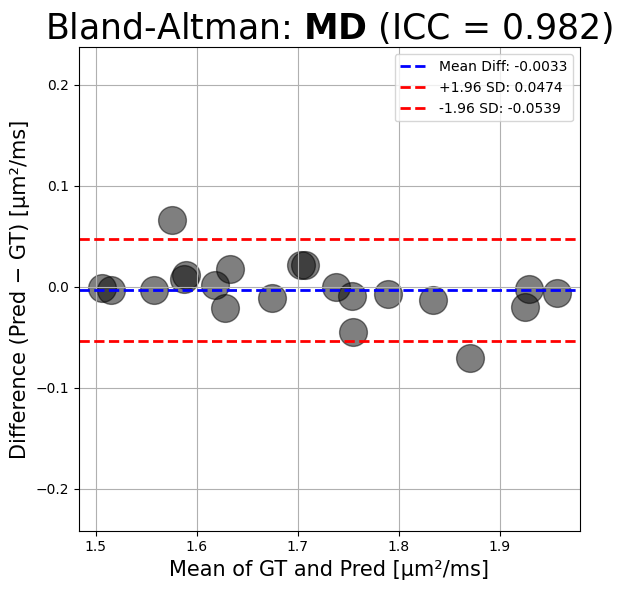

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import pingouin as pg

# === Load and process data ===
run = 'AVGMD'
csv_file_path = os.path.join(
    main_dir,
    f'ReviewHannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx'
)

df = pd.read_excel(csv_file_path)

# Clean NaNs and ensure numeric values
df['GT_Median_MD'] = pd.to_numeric(df['GT_Median_MD'], errors='coerce')
df['Pred_median_MD'] = pd.to_numeric(df['Pred_median_MD'], errors='coerce')
df_clean = df.dropna(subset=['GT_Median_MD', 'Pred_median_MD'])

# === ICC(3,1) calculation using correct long-format DataFrame ===
n = len(df_clean)
icc_df = pd.DataFrame({
    'subject': np.tile(df_clean['Case ID'].values, 2),
    'rater': ['GT'] * n + ['Pred'] * n,
    'score': np.concatenate([df_clean['GT_Median_MD'].values, df_clean['Pred_median_MD'].values])
})

icc = pg.intraclass_corr(data=icc_df, targets='subject', raters='rater', ratings='score')
icc_3_1 = icc[icc['Type'] == 'ICC3']['ICC'].values[0]

print(f"ICC(3,1) between GT and Pred for MD: {icc_3_1:.4f}")

# === Bland-Altman ===
gt = df_clean['GT_Median_MD'].values
pred = df_clean['Pred_median_MD'].values
mean_values = (gt + pred) / 2
diff_values = pred - gt
mean_diff = np.mean(diff_values)
std_diff = np.std(diff_values)
loa_upper = mean_diff + 1.96 * std_diff
loa_lower = mean_diff - 1.96 * std_diff

plt.figure(figsize=(6, 6))
ax = plt.gca()

# Plot with larger points
ax.scatter(mean_values, diff_values, color='black', alpha=0.5, s=400)

# Lines: mean diff and limits of agreement
ax.axhline(mean_diff, color='blue', linestyle='--', linewidth=2, label=f'Mean Diff: {mean_diff:.4f}')
ax.axhline(loa_upper, color='red', linestyle='--', linewidth=2, label=f'+1.96 SD: {loa_upper:.4f}')
ax.axhline(loa_lower, color='red', linestyle='--', linewidth=2, label=f'-1.96 SD: {loa_lower:.4f}')

# Labels
ax.set_xlabel('Mean of GT and Pred [μm²/ms]', fontsize=15)
ax.set_ylabel('Difference (Pred − GT) [μm²/ms]', fontsize=15)

# Bold only MD or FA using LaTeX math text
ax.set_title(r'Bland-Altman: $\mathbf{MD}$ (ICC = %.3f)' % icc_3_1, fontsize=25)

# Uniform axis scaling
ax.set_aspect('equal', adjustable='datalim')

# Styling
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.savefig("BlandAltman_MD_Model2_withICC_equalAspect.png", dpi=300)
# plt.show()


ICC(3,1) between GT and Pred for FA: 0.9861


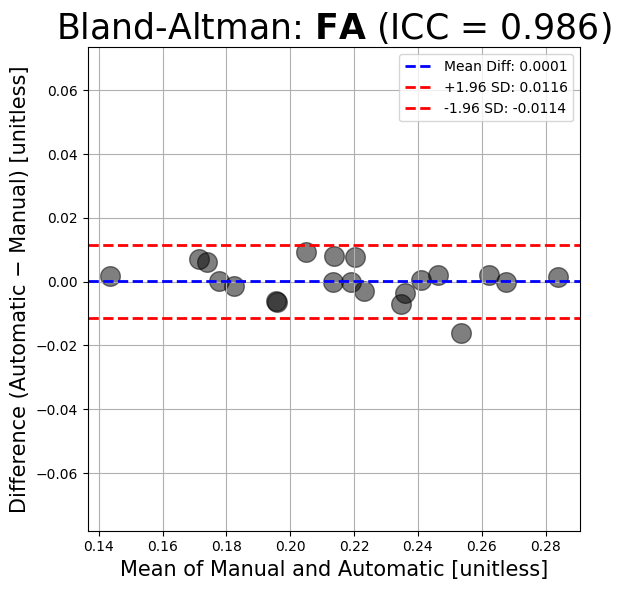

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import pingouin as pg

# === Setup for FA run ===
run = 'AVGMD'
csv_file_path = os.path.join(
    main_dir,
    f'ReviewHannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx'
)

# === Load and clean data ===
df = pd.read_excel(csv_file_path)
df['GT_Median_FA'] = pd.to_numeric(df['GT_Median_FA'], errors='coerce')
df['Pred_median_FA'] = pd.to_numeric(df['Pred_median_FA'], errors='coerce')
df_clean = df.dropna(subset=['GT_Median_FA', 'Pred_median_FA'])

# === ICC(3,1) computation ===
n = len(df_clean)
icc_df = pd.DataFrame({
    'subject': np.tile(df_clean['Case ID'].values, 2),
    'rater': ['GT'] * n + ['Pred'] * n,
    'score': np.concatenate([df_clean['GT_Median_FA'].values, df_clean['Pred_median_FA'].values])
})

icc = pg.intraclass_corr(data=icc_df, targets='subject', raters='rater', ratings='score')
icc_3_1 = icc[icc['Type'] == 'ICC3']['ICC'].values[0]

print(f"ICC(3,1) between GT and Pred for FA: {icc_3_1:.4f}")

# === Bland-Altman analysis ===
gt = df_clean['GT_Median_FA'].values
pred = df_clean['Pred_median_FA'].values
mean_values = (gt + pred) / 2
diff_values = pred - gt
mean_diff = np.mean(diff_values)
std_diff = np.std(diff_values)
loa_upper = mean_diff + 1.96 * std_diff
loa_lower = mean_diff - 1.96 * std_diff

# === Bland-Altman Plot ===
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(mean_values, diff_values, color='black', alpha=0.5, s=200)
ax.axhline(mean_diff, color='blue', linestyle='--', linewidth=2, label=f'Mean Diff: {mean_diff:.4f}')
ax.axhline(loa_upper, color='red', linestyle='--', linewidth=2, label=f'+1.96 SD: {loa_upper:.4f}')
ax.axhline(loa_lower, color='red', linestyle='--', linewidth=2, label=f'-1.96 SD: {loa_lower:.4f}')
ax.set_xlabel('Mean of Manual and Automatic [unitless]', fontsize=15)
ax.set_ylabel('Difference (Automatic − Manual) [unitless]', fontsize=15)

# === Only bold the FA ===
ax.set_title(r'Bland-Altman: $\mathbf{FA}$ (ICC = %.3f)' % icc_3_1, fontsize=25)

# === Equal axis scaling ===
ax.set_aspect('equal', adjustable='datalim')

# === Final formatting ===
ax.legend()
ax.grid(True)
fig.tight_layout()
fig.savefig("BlandAltman_FA_Model2_withICC_equalAspect.png", dpi=300)
# plt.show()
